## Project no. 5 - Pick up the following stocks from the "Stocks" dataset and generate forecasts accordingly for the following stocks 

### 1) SP500
### 2) NASDAQ.AAPL
### 3) NASDAQ.ADP
### 4) NASDAC.CBOE
### 5) NASDAC.CSCO
### 6) NASDAQ.EBAY

In [1]:
# Problem statement

# End to End ARIMA forecasting model is being used on the following stocks to generate forecasts

# Stocks :

#1. sp500
#2. NASDAQ.AAPL
#3. NASDAQ.ADP
#4. NASDAQ.CBOE
#5. NASDAQ.CSCO
#6. NASDAQ.EBAY

### Analyzing SP500

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('data_stocks.csv')

In [4]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
df['logsp500']= np.log(df['SP500'])
df['diflogsp500']= df['logsp500'] - df['logsp500'].shift(periods=-1)
df = df.dropna()

In [6]:
df.shape

(41265, 504)

In [7]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logsp500,diflogsp500
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,7.767945,-0.000207
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,7.768153,0.000601
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,7.767552,-0.000690
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,7.768242,-0.000228
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,7.768470,-0.000326


In [8]:
data = df[['DATE', 'SP500', 'logsp500', 'diflogsp500']]

In [9]:
data.head()

,DATE,SP500,logsp500,diflogsp500
0,1491226200,2363.6101,7.767945,-0.000207
1,1491226260,2364.1001,7.768153,0.000601
2,1491226320,2362.6799,7.767552,-0.000690
3,1491226380,2364.3101,7.768242,-0.000228
4,1491226440,2364.8501,7.768470,-0.000326


Text(0.5,0,'Day')

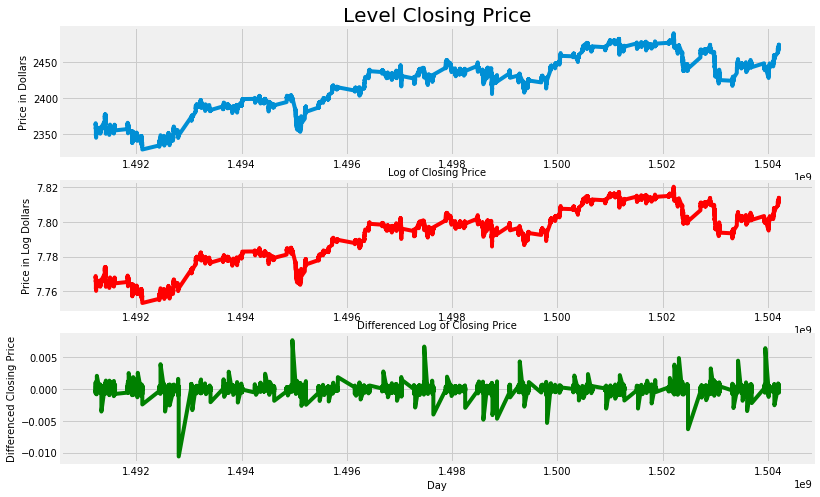

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(data.DATE, data.SP500, label = "SP500 Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.DATE, data.logsp500, label = 'Log of SP500', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.DATE, data.diflogsp500, label = '1st Difference of Log of SP500', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0,0.5,'PACF')

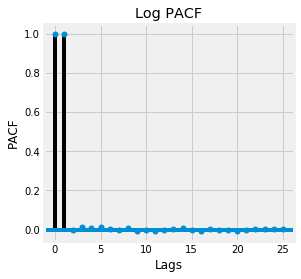

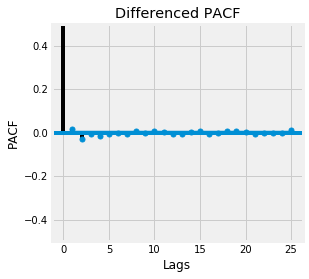

In [11]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.logsp500, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.diflogsp500, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

C:\Users\skhaldar\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


Text(0.5,1,'Logged Differenced ACF Plot')

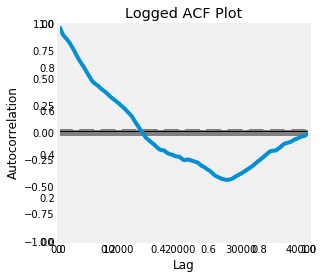

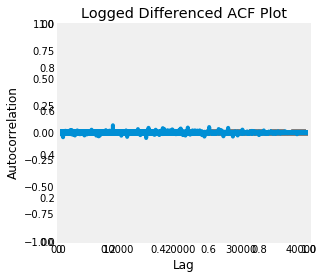

In [12]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data.logsp500)
ax.set_title('Logged ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data.diflogsp500)
ax.set_title('Logged Differenced ACF Plot')

In [13]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogsp500, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -29.797448
p-value                            0.000000
# Lags Used                       45.000000
Number of Observations used    41219.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [14]:
ararray = (data.logsp500.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
                  

(0, 1, 0) -576197.2378325625


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 1, 1) -576205.4988830332
(0, 1, 2) -576244.0626306937
(1, 1, 0) -576204.8971420522
(1, 1, 1) -576210.877090487
(1, 1, 2) -576247.3238615177
(2, 1, 0) -576243.5825036691


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 1, 1) -576245.5796656315


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 2) -576232.5838080812
Best Model is : (1, 1, 2)


In [15]:
ARIMIAmod

In [16]:
predict = ARIMIAmod.predict()
predict

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([ 1.07815510e-06,  4.15221043e-06, -1.49441259e-05, ...,
        1.09460990e-05, -2.19487949e-06, -3.35349140e-06])

In [17]:
predict.shape

(41264,)

In [18]:
len(ARIMIAmod.predict())

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


41264

In [19]:
data1 = data.drop(data.index[0])

In [20]:
data1.shape

(41264, 4)

In [21]:
data1['predict'] = predict

In [22]:
data1.head()

,DATE,SP500,logsp500,diflogsp500,predict
1,1491226260,2364.1001,7.768153,0.000601,0.000001
2,1491226320,2362.6799,7.767552,-0.000690,0.000004
3,1491226380,2364.3101,7.768242,-0.000228,-0.000015
4,1491226440,2364.8501,7.768470,-0.000326,0.000030
5,1491226500,2365.6201,7.768795,0.000178,-0.000014


In [23]:
np.mean(np.square(np.array((data1['diflogsp500'] - data1['predict']))))

5.0545662220361074e-08

In [24]:
numofsteps = 1
stephead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([[7.81217094, 7.81305108]])

In [25]:
error = (data1['diflogsp500'] - data1['predict'])
data1['sqrError'] = np.square(error)

In [26]:
data1.head()

,DATE,SP500,logsp500,diflogsp500,predict,sqrError
1,1491226260,2364.1001,7.768153,0.000601,0.000001,3.598060e-07
2,1491226320,2362.6799,7.767552,-0.000690,0.000004,4.814882e-07
3,1491226380,2364.3101,7.768242,-0.000228,-0.000015,4.555076e-08
4,1491226440,2364.8501,7.768470,-0.000326,0.000030,1.261180e-07
5,1491226500,2365.6201,7.768795,0.000178,-0.000014,3.675101e-08


In [27]:
data1['errors'] = error

In [28]:
data1.head()

,DATE,SP500,logsp500,diflogsp500,predict,sqrError,errors
1,1491226260,2364.1001,7.768153,0.000601,0.000001,3.598060e-07,0.000600
2,1491226320,2362.6799,7.767552,-0.000690,0.000004,4.814882e-07,-0.000694
3,1491226380,2364.3101,7.768242,-0.000228,-0.000015,4.555076e-08,-0.000213
4,1491226440,2364.8501,7.768470,-0.000326,0.000030,1.261180e-07,-0.000355
5,1491226500,2365.6201,7.768795,0.000178,-0.000014,3.675101e-08,0.000192


Text(0.5,0,'Month')

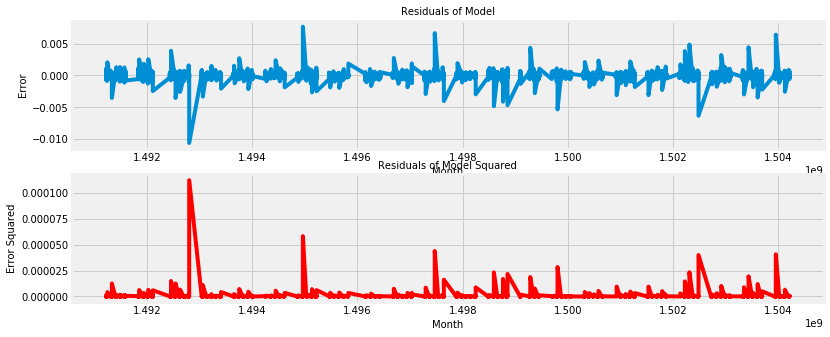

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(data1.DATE, data1.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data1.DATE, data1.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)


C:\Users\skhaldar\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


Text(0.5,1,'Squared Error ACF Plot')

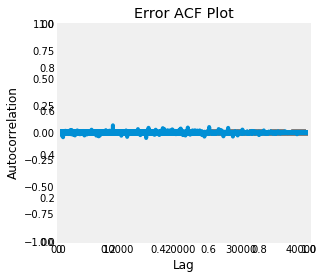

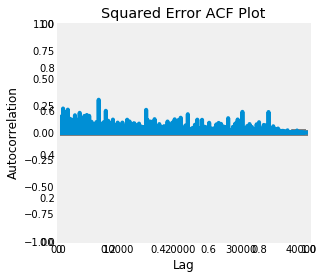

In [30]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data1.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data1.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0,0.5,'PACF')

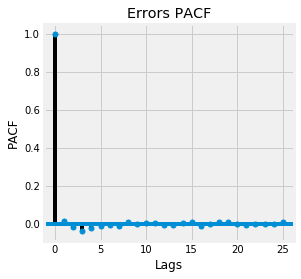

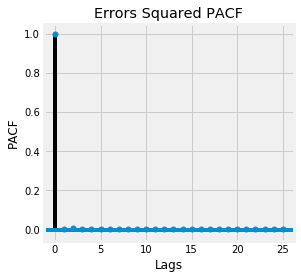

In [31]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data1.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data1.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

### Analyzing NASDAQ.AAPL

In [32]:
df1 = pd.read_csv('data_stocks.csv')

In [96]:
df1['logNASDAQ.AAPL']= np.log(df1['NASDAQ.AAPL'])
df1['diflogNASDAQ.AAPL']= df1['logNASDAQ.AAPL'] - df1['logNASDAQ.AAPL'].shift(periods=-1)
df1 = df1.dropna()

In [97]:
df1.shape

(41264, 506)

In [98]:
df1.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.0900
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.0725
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.0725
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.0800
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.0200


In [99]:
data2 = df1[['DATE', 'NASDAQ.AAPL', 'logNASDAQ.AAPL', 'diflogNASDAQ.AAPL']]

In [100]:
data2.head()

,DATE,NASDAQ.AAPL,logNASDAQ.AAPL,diflogNASDAQ.AAPL
0,1491226200,143.6800,4.967589,-0.000139
1,1491226260,143.7000,4.967728,0.000069
2,1491226320,143.6901,4.967659,0.000349
3,1491226380,143.6400,4.967310,-0.000139
4,1491226440,143.6600,4.967449,-0.000835


In [101]:
Data2 = data2.rename(index=str, columns={"NASDAQ.AAPL":"NASDAQ_AAPL", "logNASDAQ.AAPL":"logNASDAQ_AAPL", "diflogNASDAQ.AAPL":"diflogNASDAQ_AAPL"})
Data2.head()

,DATE,NASDAQ_AAPL,logNASDAQ_AAPL,diflogNASDAQ_AAPL
0,1491226200,143.6800,4.967589,-0.000139
1,1491226260,143.7000,4.967728,0.000069
2,1491226320,143.6901,4.967659,0.000349
3,1491226380,143.6400,4.967310,-0.000139
4,1491226440,143.6600,4.967449,-0.000835


Text(0.5,0,'Day')

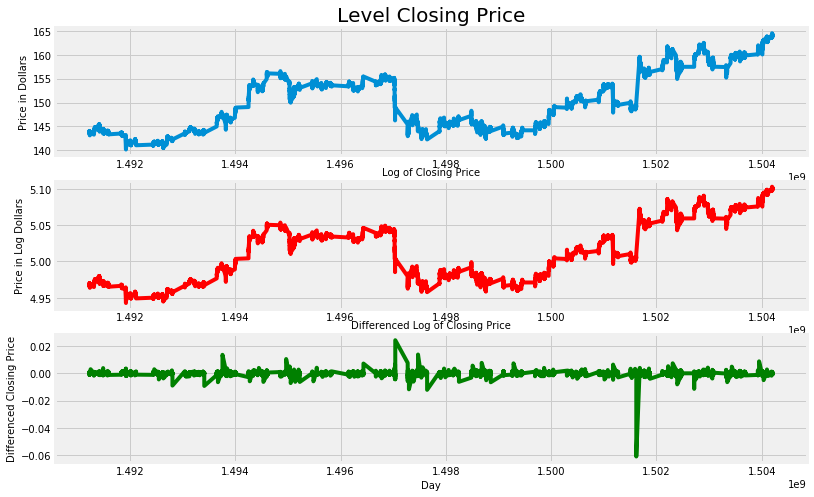

In [102]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data2.DATE, Data2.NASDAQ_AAPL, label = "NASDAQ.AAPL Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data2.DATE, Data2.logNASDAQ_AAPL, label = 'Log of NASDAQ.AAPL', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(Data2.DATE, Data2.diflogNASDAQ_AAPL, label = '1st Difference of Log of NASDAQ.AAPL', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0,0.5,'PACF')

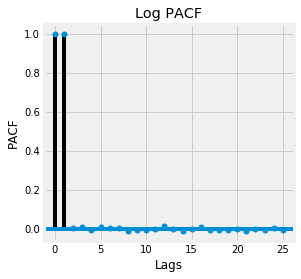

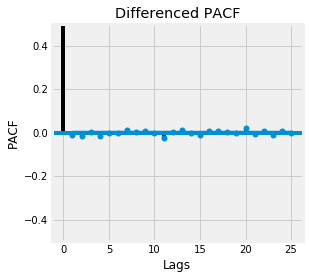

In [103]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data2.logNASDAQ_AAPL, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data2.diflogNASDAQ_AAPL, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [104]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest1 = adfuller(Data2.diflogNASDAQ_AAPL, autolag='AIC')
dfoutput1 = pd.Series(dftest1[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest1[4].items():
    dfoutput1['Critical Value (%s)'%key] = value
print (dfoutput1)

Results of Dickey-Fuller Test:
Test Statistic                   -35.704395
p-value                            0.000000
# Lags Used                       30.000000
Number of Observations used    41233.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [105]:
ararray1 = (Data2.logNASDAQ_AAPL.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray1, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod1 = ARIMA(ararray1, (p,d,q)).fit()

(0, 1, 0) -492689.628814453


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -492691.2955018546
(0, 1, 2) -492702.40871225984
(1, 1, 0) -492691.1705248717


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 1) -492691.69245713274
(1, 1, 2) -492703.1002256031
(2, 1, 0) -492702.14446474204
(2, 1, 1) -492702.5477501856
Best Model is : (1, 1, 2)


In [106]:
ARIMIAmod1

In [107]:
predict1 = ARIMIAmod1.predict()
predict1

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([3.20553408e-06, 1.94448804e-06, 1.44004712e-06, ...,
       1.05573351e-05, 1.00860895e-05, 4.68489472e-06])

In [108]:
predict1.shape

(41263,)

In [110]:
len(ARIMIAmod1.predict())

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


41263

In [111]:
Data21 = Data2.drop(Data2.index[0])

In [112]:
Data21.shape

(41263, 4)

In [113]:
Data21['predict'] = predict1

In [114]:
Data21.head()

,DATE,NASDAQ_AAPL,logNASDAQ_AAPL,diflogNASDAQ_AAPL,predict
1,1491226260,143.7000,4.967728,0.000069,0.000003
2,1491226320,143.6901,4.967659,0.000349,0.000002
3,1491226380,143.6400,4.967310,-0.000139,0.000001
4,1491226440,143.6600,4.967449,-0.000835,0.000008
5,1491226500,143.7800,4.968284,-0.000584,0.000008


In [115]:
np.mean(np.square(np.array((Data21['diflogNASDAQ_AAPL'] - Data21['predict']))))

3.8208816366844564e-07

In [116]:
numofsteps1 = 1
stephead1 = ARIMIAmod.forecast(numofsteps1)[0]
ferrors1 = ARIMIAmod.forecast(numofsteps1)[2]
ferrors1

array([[7.81217094, 7.81305108]])

In [117]:
error1 = (Data21['diflogNASDAQ_AAPL'] - Data21['predict'])
Data21['sqrError'] = np.square(error1)

In [118]:
Data21.head()

,DATE,NASDAQ_AAPL,logNASDAQ_AAPL,diflogNASDAQ_AAPL,predict,sqrError
1,1491226260,143.7000,4.967728,0.000069,0.000003,4.315224e-09
2,1491226320,143.6901,4.967659,0.000349,0.000002,1.202587e-07
3,1491226380,143.6400,4.967310,-0.000139,0.000001,1.978730e-08
4,1491226440,143.6600,4.967449,-0.000835,0.000008,7.113630e-07
5,1491226500,143.7800,4.968284,-0.000584,0.000008,3.501250e-07


In [119]:
Data21['errors'] = error1

In [120]:
Data21.head()

,DATE,NASDAQ_AAPL,logNASDAQ_AAPL,diflogNASDAQ_AAPL,predict,sqrError,errors
1,1491226260,143.7000,4.967728,0.000069,0.000003,4.315224e-09,0.000066
2,1491226320,143.6901,4.967659,0.000349,0.000002,1.202587e-07,0.000347
3,1491226380,143.6400,4.967310,-0.000139,0.000001,1.978730e-08,-0.000141
4,1491226440,143.6600,4.967449,-0.000835,0.000008,7.113630e-07,-0.000843
5,1491226500,143.7800,4.968284,-0.000584,0.000008,3.501250e-07,-0.000592


Text(0.5,0,'Month')

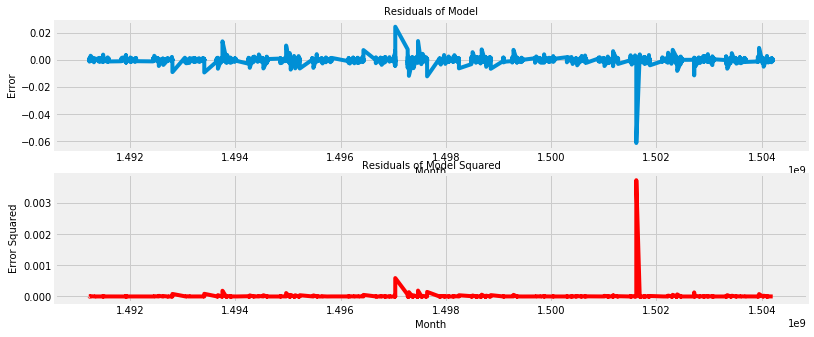

In [121]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data21.DATE, Data21.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data21.DATE, Data21.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

C:\Users\skhaldar\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


Text(0.5,1,'Squared Error ACF Plot')

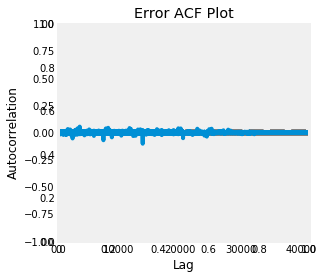

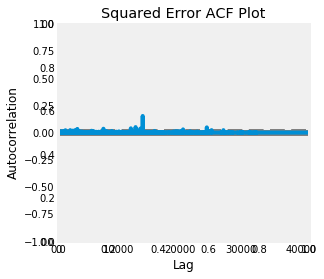

In [122]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data21.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data21.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0,0.5,'PACF')

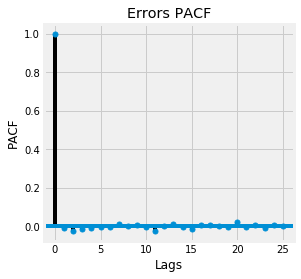

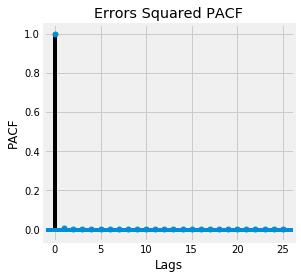

In [123]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data21.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data21.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

### Analyzing NASDAQ.ADP

In [124]:
df2 = df1
df2.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.0900
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.0725
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.0725
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.0800
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.0200


In [125]:
df2['logNASDAQ.ADP']= np.log(df2['NASDAQ.ADP'])
df2['diflogNASDAQ.ADP']= df2['logNASDAQ.ADP'] - df2['logNASDAQ.ADP'].shift(periods=-1)
df2 = df2.dropna()

C:\Users\skhaldar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\skhaldar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [126]:
df2.shape

(41263, 506)

In [127]:
data3 = df2[['DATE', 'NASDAQ.ADP', 'logNASDAQ.ADP', 'diflogNASDAQ.ADP']]

In [128]:
df2.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.000881
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.000710
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.000710
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.000784
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.000196


In [129]:
data3.head()

,DATE,NASDAQ.ADP,logNASDAQ.ADP,diflogNASDAQ.ADP
0,1491226200,102.2300,4.627225,0.000881
1,1491226260,102.1400,4.626344,-0.000710
2,1491226320,102.2125,4.627054,0.000710
3,1491226380,102.1400,4.626344,0.000784
4,1491226440,102.0600,4.625561,0.000196


In [130]:
Data3 = data3.rename(index=str, columns={"NASDAQ.ADP":"NASDAQ_ADP", "logNASDAQ.ADP":"logNASDAQ_ADP", "diflogNASDAQ.ADP":"diflogNASDAQ_ADP"})
Data3.head()

,DATE,NASDAQ_ADP,logNASDAQ_ADP,diflogNASDAQ_ADP
0,1491226200,102.2300,4.627225,0.000881
1,1491226260,102.1400,4.626344,-0.000710
2,1491226320,102.2125,4.627054,0.000710
3,1491226380,102.1400,4.626344,0.000784
4,1491226440,102.0600,4.625561,0.000196


Text(0.5,0,'Day')

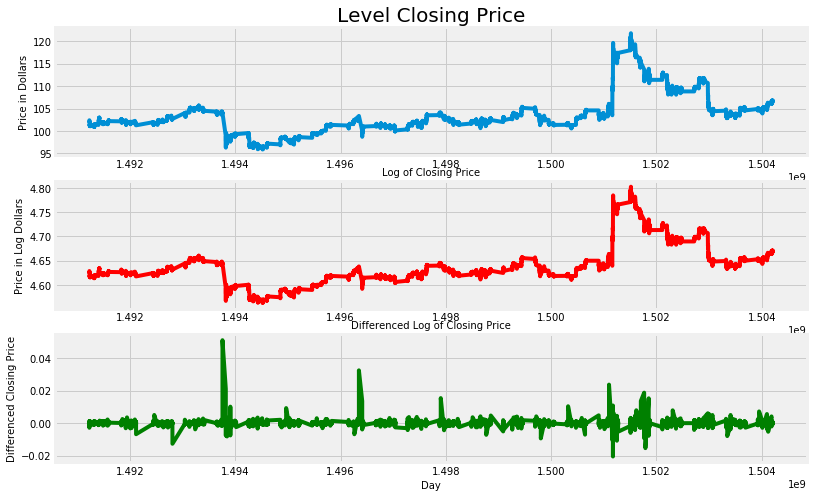

In [131]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data3.DATE, Data3.NASDAQ_ADP, label = "NASDAQ.ADP Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data3.DATE, Data3.logNASDAQ_ADP, label = 'Log of NASDAQ.ADP', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(Data3.DATE, Data3.diflogNASDAQ_ADP, label = '1st Difference of Log of NASDAQ.ADP', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0,0.5,'PACF')

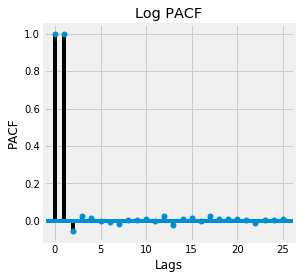

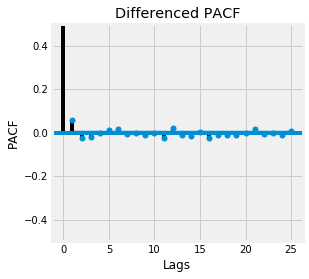

In [132]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data3.logNASDAQ_ADP, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data3.diflogNASDAQ_ADP, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [133]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest2 = adfuller(Data3.diflogNASDAQ_ADP, autolag='AIC')
dfoutput2 = pd.Series(dftest2[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest2[4].items():
    dfoutput2['Critical Value (%s)'%key] = value
print (dfoutput2)

Results of Dickey-Fuller Test:
Test Statistic                   -30.759070
p-value                            0.000000
# Lags Used                       39.000000
Number of Observations used    41223.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [134]:
ararray2 = (Data3.logNASDAQ_ADP.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray2, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod2 = ARIMA(ararray2, (p,d,q)).fit()

(0, 1, 0) -482506.39573853416


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -482658.679544618
(0, 1, 2) -482672.4186598426
(1, 1, 0) -482651.80391936295
(1, 1, 1) -482667.0923911107
(1, 1, 2) -482680.6644575703
(2, 1, 0) -482678.3762163945
(2, 1, 1) -482683.2200242913


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 1, 2) -482693.1364552716
Best Model is : (2, 1, 2)


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [135]:
ARIMIAmod2

In [136]:
predict2 = ARIMIAmod2.predict()
predict2

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([ 1.14641785e-06, -5.11345940e-05,  6.56123378e-05, ...,
       -8.49579734e-06,  7.03418684e-06, -4.27788899e-05])

In [137]:
predict2.shape

(41262,)

In [138]:
len(ARIMIAmod2.predict())

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


41262

In [139]:
Data31 = Data3.drop(Data3.index[0])

In [140]:
Data31.shape

(41262, 4)

In [141]:
Data31['predict'] = predict2

In [142]:
Data31.head()

,DATE,NASDAQ_ADP,logNASDAQ_ADP,diflogNASDAQ_ADP,predict
1,1491226260,102.1400,4.626344,-0.000710,0.000001
2,1491226320,102.2125,4.627054,0.000710,-0.000051
3,1491226380,102.1400,4.626344,0.000784,0.000066
4,1491226440,102.0600,4.625561,0.000196,-0.000036
5,1491226500,102.0400,4.625365,-0.002838,-0.000046


In [143]:
np.mean(np.square(np.array((Data31['diflogNASDAQ_ADP'] - Data31['predict']))))

4.902339983949936e-07

In [144]:
numofsteps2 = 1
stephead2 = ARIMIAmod.forecast(numofsteps2)[0]
ferrors2 = ARIMIAmod.forecast(numofsteps2)[2]
ferrors2

array([[7.81217094, 7.81305108]])

In [145]:
error2 = (Data31['diflogNASDAQ_ADP'] - Data31['predict'])
Data31['sqrError'] = np.square(error2)

In [146]:
Data31.head()

,DATE,NASDAQ_ADP,logNASDAQ_ADP,diflogNASDAQ_ADP,predict,sqrError
1,1491226260,102.1400,4.626344,-0.000710,0.000001,5.051012e-07
2,1491226320,102.2125,4.627054,0.000710,-0.000051,5.786536e-07
3,1491226380,102.1400,4.626344,0.000784,0.000066,5.154281e-07
4,1491226440,102.0600,4.625561,0.000196,-0.000036,5.374116e-08
5,1491226500,102.0400,4.625365,-0.002838,-0.000046,7.794212e-06


In [147]:
Data31['errors'] = error2

In [148]:
Data31.head()

,DATE,NASDAQ_ADP,logNASDAQ_ADP,diflogNASDAQ_ADP,predict,sqrError,errors
1,1491226260,102.1400,4.626344,-0.000710,0.000001,5.051012e-07,-0.000711
2,1491226320,102.2125,4.627054,0.000710,-0.000051,5.786536e-07,0.000761
3,1491226380,102.1400,4.626344,0.000784,0.000066,5.154281e-07,0.000718
4,1491226440,102.0600,4.625561,0.000196,-0.000036,5.374116e-08,0.000232
5,1491226500,102.0400,4.625365,-0.002838,-0.000046,7.794212e-06,-0.002792


Text(0.5,0,'Month')

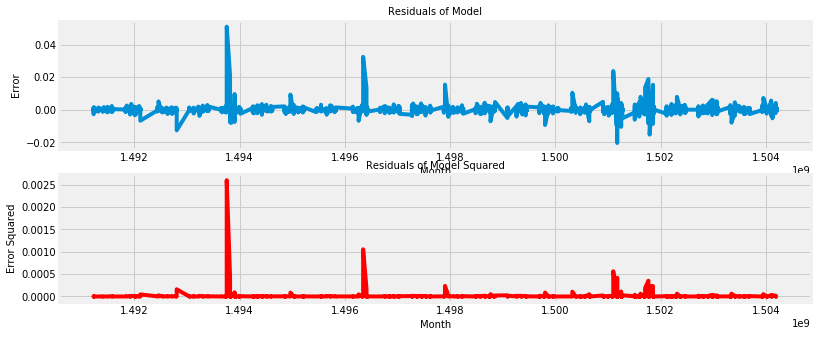

In [149]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data31.DATE, Data31.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data31.DATE, Data31.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

C:\Users\skhaldar\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


Text(0.5,1,'Squared Error ACF Plot')

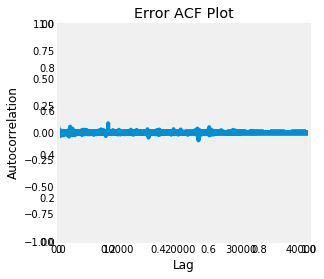

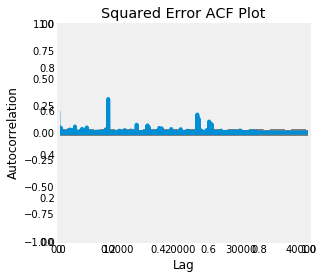

In [150]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data31.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data31.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0,0.5,'PACF')

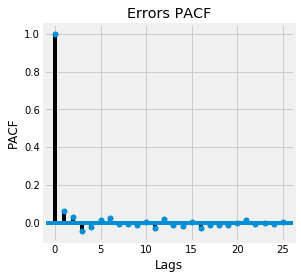

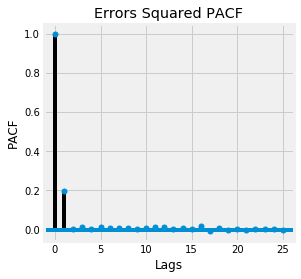

In [151]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data31.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data31.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

### Analyzing NASDAQ.CBOE

In [88]:
df3 = df1
df3.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.0200,4.627225,0.0900
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.0099,4.626344,-0.0725
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.0501,4.627054,0.0725
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.0200,4.626344,0.0800
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.1200,4.625561,0.0200


In [152]:
df3['logNASDAQ.CBOE']= np.log(df3['NASDAQ.CBOE'])
df3['diflogNASDAQ.CBOE']= df3['logNASDAQ.CBOE'] - df3['logNASDAQ.CBOE'].shift(periods=-1)
df3 = df3.dropna()

In [153]:
df3.shape

(41264, 508)

In [154]:
data4 = df3[['DATE', 'NASDAQ.CBOE', 'logNASDAQ.CBOE', 'diflogNASDAQ.CBOE']]

In [155]:
df3.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP,logNASDAQ.CBOE,diflogNASDAQ.CBOE
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.0900,4.394819,-0.002219
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.0725,4.397038,0.000000
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.0725,4.397038,0.000986
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.0800,4.396053,0.000123
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.0200,4.395930,-0.001232


In [156]:
data4.head()

,DATE,NASDAQ.CBOE,logNASDAQ.CBOE,diflogNASDAQ.CBOE
0,1491226200,81.03,4.394819,-0.002219
1,1491226260,81.21,4.397038,0.000000
2,1491226320,81.21,4.397038,0.000986
3,1491226380,81.13,4.396053,0.000123
4,1491226440,81.12,4.395930,-0.001232


In [157]:
Data4 = data4.rename(index=str, columns={"NASDAQ.CBOE":"NASDAQ_CBOE", "logNASDAQ.CBOE":"logNASDAQ_CBOE", "diflogNASDAQ.CBOE":"diflogNASDAQ_CBOE"})
Data4.head()

,DATE,NASDAQ_CBOE,logNASDAQ_CBOE,diflogNASDAQ_CBOE
0,1491226200,81.03,4.394819,-0.002219
1,1491226260,81.21,4.397038,0.000000
2,1491226320,81.21,4.397038,0.000986
3,1491226380,81.13,4.396053,0.000123
4,1491226440,81.12,4.395930,-0.001232


Text(0.5,0,'Day')

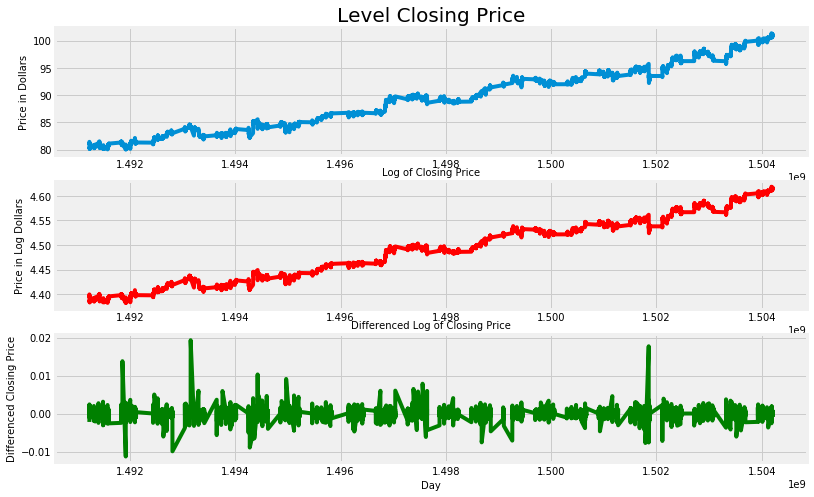

In [159]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data4.DATE, Data4.NASDAQ_CBOE, label = "NASDAQ.CBOE Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data4.DATE, Data4.logNASDAQ_CBOE, label = 'Log of NASDAQ.CBOE', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(Data4.DATE, Data4.diflogNASDAQ_CBOE, label = '1st Difference of Log of NASDAQ.CBOE', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0,0.5,'PACF')

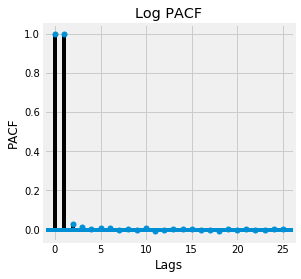

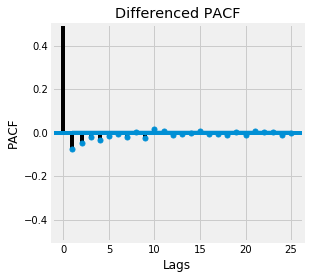

In [160]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data4.logNASDAQ_CBOE, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data4.diflogNASDAQ_CBOE, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [161]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest3 = adfuller(Data4.diflogNASDAQ_CBOE, autolag='AIC')
dfoutput3 = pd.Series(dftest3[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest3[4].items():
    dfoutput3['Critical Value (%s)'%key] = value
print (dfoutput3)

Results of Dickey-Fuller Test:
Test Statistic                   -42.178016
p-value                            0.000000
# Lags Used                       25.000000
Number of Observations used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [163]:
ararray3 = (Data4.logNASDAQ_CBOE.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray3, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod3 = ARIMA(ararray3, (p,d,q)).fit()

(0, 1, 0) -506057.8630506855


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -506323.6109051106
(0, 1, 2) -506414.54809907475
(1, 1, 0) -506300.69347224815
(1, 1, 1) -506457.96282225277
(1, 1, 2) -506449.8538253716
(2, 1, 0) -506396.06013964175
(2, 1, 1) -506451.0434119025


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 2) -506457.28648307547
Best Model is : (1, 1, 1)


In [164]:
ARIMIAmod3

In [165]:
predict3 = ARIMIAmod3.predict()
predict3

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([ 5.29426798e-06, -1.65743159e-04, -9.58111468e-05, ...,
        4.49103479e-06,  5.17195553e-06,  1.38616515e-05])

In [166]:
predict3.shape

(41263,)

In [167]:
len(ARIMIAmod3.predict())

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


41263

In [168]:
Data41 = Data4.drop(Data4.index[0])

In [169]:
Data41.shape

(41263, 4)

In [170]:
Data41['predict'] = predict3

In [171]:
Data41.head()

,DATE,NASDAQ_CBOE,logNASDAQ_CBOE,diflogNASDAQ_CBOE,predict
1,1491226260,81.21,4.397038,0.000000,0.000005
2,1491226320,81.21,4.397038,0.000986,-0.000166
3,1491226380,81.13,4.396053,0.000123,-0.000096
4,1491226440,81.12,4.395930,-0.001232,0.000026
5,1491226500,81.22,4.397162,0.000739,0.000029


In [172]:
np.mean(np.square(np.array((Data41['diflogNASDAQ_CBOE'] - Data41['predict']))))

2.8158217407775853e-07

In [173]:
numofsteps3 = 1
stephead3 = ARIMIAmod.forecast(numofsteps3)[0]
ferrors3 = ARIMIAmod.forecast(numofsteps3)[2]
ferrors3

array([[7.81217094, 7.81305108]])

In [179]:
error3 = (Data41['diflogNASDAQ_CBOE'] - Data41['predict'])
Data41['sqrError'] = np.square(error3)

In [180]:
Data41.head()

,DATE,NASDAQ_CBOE,logNASDAQ_CBOE,diflogNASDAQ_CBOE,predict,errors,sqrError
1,1491226260,81.21,4.397038,0.000000,0.000005,-0.000005,2.802927e-11
2,1491226320,81.21,4.397038,0.000986,-0.000166,0.001151,1.325559e-06
3,1491226380,81.13,4.396053,0.000123,-0.000096,0.000219,4.799504e-08
4,1491226440,81.12,4.395930,-0.001232,0.000026,-0.001258,1.583679e-06
5,1491226500,81.22,4.397162,0.000739,0.000029,0.000711,5.048179e-07


In [181]:
Data41['errors'] = error3

In [182]:
Data41.head()

,DATE,NASDAQ_CBOE,logNASDAQ_CBOE,diflogNASDAQ_CBOE,predict,errors,sqrError
1,1491226260,81.21,4.397038,0.000000,0.000005,-0.000005,2.802927e-11
2,1491226320,81.21,4.397038,0.000986,-0.000166,0.001151,1.325559e-06
3,1491226380,81.13,4.396053,0.000123,-0.000096,0.000219,4.799504e-08
4,1491226440,81.12,4.395930,-0.001232,0.000026,-0.001258,1.583679e-06
5,1491226500,81.22,4.397162,0.000739,0.000029,0.000711,5.048179e-07


Text(0.5,0,'Month')

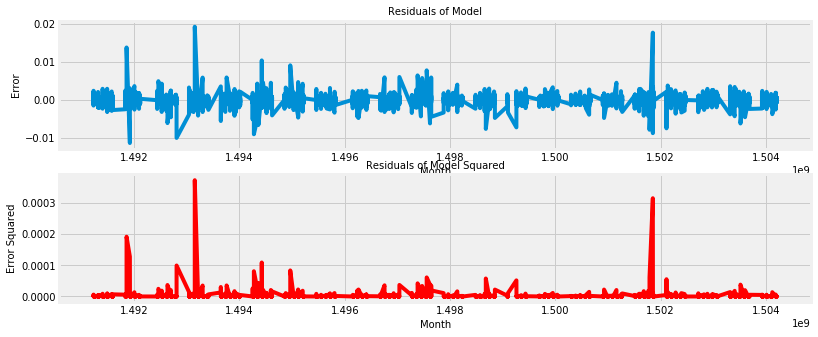

In [183]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data41.DATE, Data41.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data41.DATE, Data41.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

C:\Users\skhaldar\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


Text(0.5,1,'Squared Error ACF Plot')

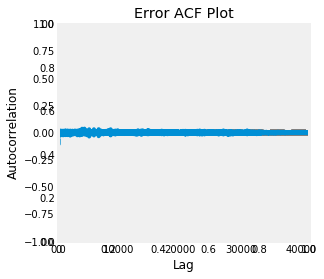

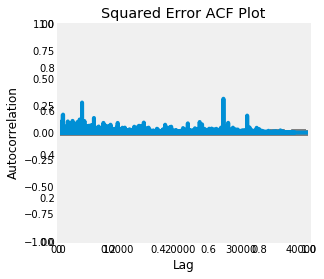

In [184]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data41.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data41.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0,0.5,'PACF')

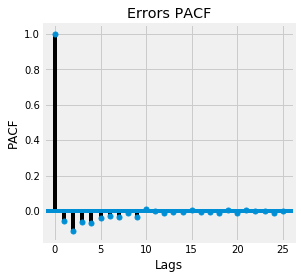

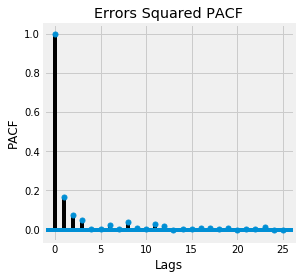

In [185]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data41.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data41.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

### Analyzing NASDAQ.CSCO

In [186]:
df4 = df1
df4.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.000881
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.000710
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.000710
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.000784
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.000196


In [187]:
df4['logNASDAQ.CSCO']= np.log(df4['NASDAQ.CSCO'])
df4['diflogNASDAQ.CSCO']= df4['logNASDAQ.CSCO'] - df4['logNASDAQ.CSCO'].shift(periods=-1)
df4 = df4.dropna()

In [188]:
df4.shape

(41263, 508)

In [189]:
data5 = df4[['DATE', 'NASDAQ.CSCO', 'logNASDAQ.CSCO', 'diflogNASDAQ.CSCO']]

In [190]:
df4.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP,logNASDAQ.CSCO,diflogNASDAQ.CSCO
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.000881,3.518684,-0.004141
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.000710,3.522825,-0.000590
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.000710,3.523415,0.001479
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.000784,3.521936,0.000293
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.000196,3.521644,-0.001181


In [191]:
data5.head()

,DATE,NASDAQ.CSCO,logNASDAQ.CSCO,diflogNASDAQ.CSCO
0,1491226200,33.7400,3.518684,-0.004141
1,1491226260,33.8800,3.522825,-0.000590
2,1491226320,33.9000,3.523415,0.001479
3,1491226380,33.8499,3.521936,0.000293
4,1491226440,33.8400,3.521644,-0.001181


In [192]:
Data5 = data5.rename(index=str, columns={"NASDAQ.CSCO":"NASDAQ_CSCO", "logNASDAQ.CSCO":"logNASDAQ_CSCO", "diflogNASDAQ.CSCO":"diflogNASDAQ_CSCO"})
Data5.head()

,DATE,NASDAQ_CSCO,logNASDAQ_CSCO,diflogNASDAQ_CSCO
0,1491226200,33.7400,3.518684,-0.004141
1,1491226260,33.8800,3.522825,-0.000590
2,1491226320,33.9000,3.523415,0.001479
3,1491226380,33.8499,3.521936,0.000293
4,1491226440,33.8400,3.521644,-0.001181


Text(0.5,0,'Day')

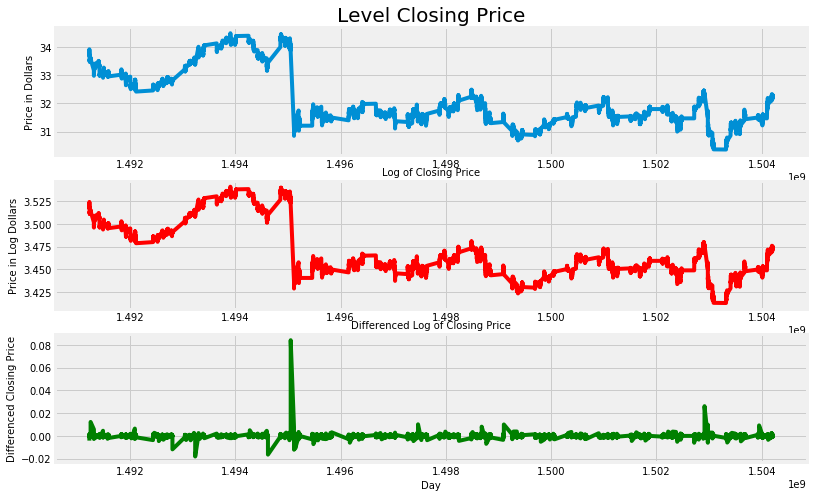

In [193]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data5.DATE, Data5.NASDAQ_CSCO, label = "NASDAQ.CSCO Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data5.DATE, Data5.logNASDAQ_CSCO, label = 'Log of NASDAQ.CSCO', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(Data5.DATE, Data5.diflogNASDAQ_CSCO, label = '1st Difference of Log of NASDAQ.CSCO', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0,0.5,'PACF')

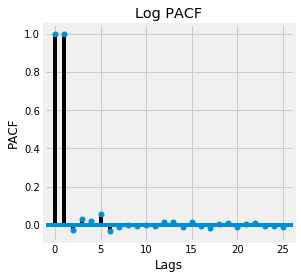

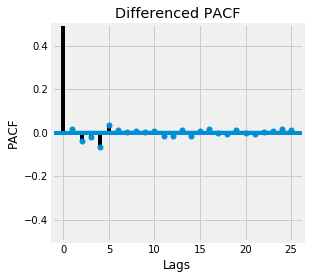

In [195]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data5.logNASDAQ_CSCO, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data5.diflogNASDAQ_CSCO, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [197]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest4 = adfuller(Data5.diflogNASDAQ_CSCO, autolag='AIC')
dfoutput3 = pd.Series(dftest4[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest4[4].items():
    dfoutput3['Critical Value (%s)'%key] = value
print (dfoutput3)

Results of Dickey-Fuller Test:
Test Statistic                   -30.368014
p-value                            0.000000
# Lags Used                       46.000000
Number of Observations used    41216.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [198]:
ararray4 = (Data5.logNASDAQ_CSCO.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray4, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod4 = ARIMA(ararray4, (p,d,q)).fit()

(0, 1, 0) -486828.20149092237


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -486837.7339050425
(0, 1, 2) -486898.86592575966
(1, 1, 0) -486836.93845327396


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 1) -486838.49787328194
(1, 1, 2) -486898.47680758487
(2, 1, 0) -486893.0596214493
(2, 1, 1) -486891.50133156474
(2, 1, 2) -486908.43477628543
Best Model is : (2, 1, 2)


In [199]:
ARIMIAmod4

In [200]:
predict4 = ARIMIAmod4.predict()
predict4

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([-1.13842556e-06,  6.46193486e-05, -1.47531308e-04, ...,
       -3.96188556e-05,  4.25140379e-06,  2.62266455e-05])

In [201]:
predict4.shape

(41262,)

In [202]:
len(ARIMIAmod4.predict())

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


41262

In [203]:
Data51 = Data5.drop(Data5.index[0])

In [204]:
Data51.shape

(41262, 4)

In [205]:
Data51['predict'] = predict4

In [206]:
Data51.head()

,DATE,NASDAQ_CSCO,logNASDAQ_CSCO,diflogNASDAQ_CSCO,predict
1,1491226260,33.8800,3.522825,-0.000590,-0.000001
2,1491226320,33.9000,3.523415,0.001479,0.000065
3,1491226380,33.8499,3.521936,0.000293,-0.000148
4,1491226440,33.8400,3.521644,-0.001181,-0.000044
5,1491226500,33.8800,3.522825,-0.000590,0.000034


In [207]:
np.mean(np.square(np.array((Data51['diflogNASDAQ_CSCO'] - Data51['predict']))))

4.402951919929699e-07

In [208]:
numofsteps4 = 1
stephead4 = ARIMIAmod.forecast(numofsteps4)[0]
ferrors4 = ARIMIAmod.forecast(numofsteps4)[2]
ferrors4

array([[7.81217094, 7.81305108]])

In [210]:
error4 = (Data51['diflogNASDAQ_CSCO'] - Data51['predict'])
Data51['sqrError'] = np.square(error4)

In [211]:
Data51.head()

,DATE,NASDAQ_CSCO,logNASDAQ_CSCO,diflogNASDAQ_CSCO,predict,sqrError
1,1491226260,33.8800,3.522825,-0.000590,-0.000001,3.469283e-07
2,1491226320,33.9000,3.523415,0.001479,0.000065,2.000386e-06
3,1491226380,33.8499,3.521936,0.000293,-0.000148,1.936367e-07
4,1491226440,33.8400,3.521644,-0.001181,-0.000044,1.293068e-06
5,1491226500,33.8800,3.522825,-0.000590,0.000034,3.890903e-07


In [212]:
Data51['errors'] = error4

In [213]:
Data51.head()

,DATE,NASDAQ_CSCO,logNASDAQ_CSCO,diflogNASDAQ_CSCO,predict,sqrError,errors
1,1491226260,33.8800,3.522825,-0.000590,-0.000001,3.469283e-07,-0.000589
2,1491226320,33.9000,3.523415,0.001479,0.000065,2.000386e-06,0.001414
3,1491226380,33.8499,3.521936,0.000293,-0.000148,1.936367e-07,0.000440
4,1491226440,33.8400,3.521644,-0.001181,-0.000044,1.293068e-06,-0.001137
5,1491226500,33.8800,3.522825,-0.000590,0.000034,3.890903e-07,-0.000624


Text(0.5,0,'Month')

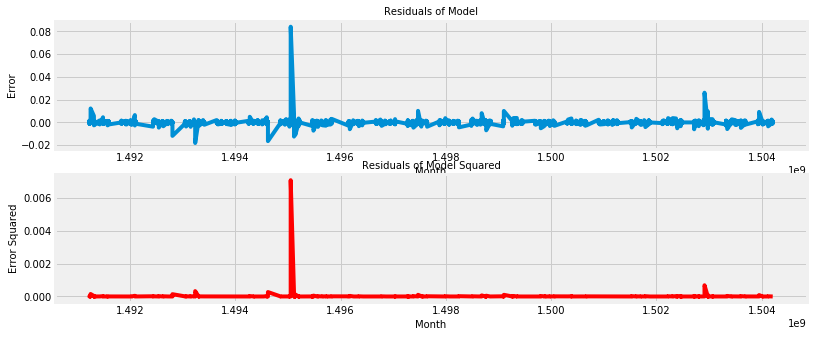

In [214]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data51.DATE, Data51.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data51.DATE, Data51.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

C:\Users\skhaldar\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


Text(0.5,1,'Squared Error ACF Plot')

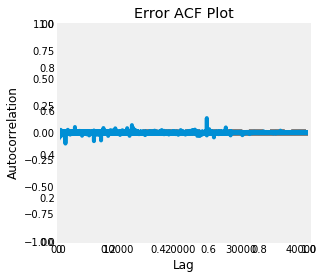

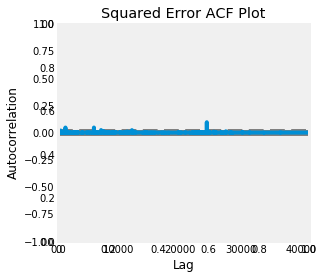

In [215]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data51.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data51.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0,0.5,'PACF')

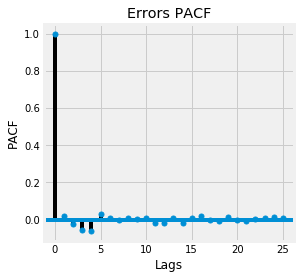

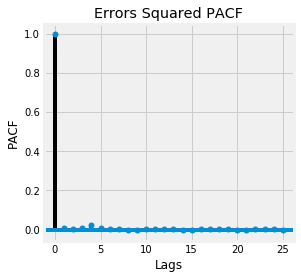

In [216]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data51.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data51.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

### Analyzing NASDAQ.EBAY

In [217]:
df5 = df1
df5.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP,logNASDAQ.CSCO,diflogNASDAQ.CSCO
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,50.22,63.86,122.000,53.350,4.967589,-0.000139,4.627225,0.000881,3.518684,-0.004141
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,50.22,63.74,121.770,53.350,4.967728,0.000069,4.626344,-0.000710,3.522825,-0.000590
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,50.12,63.75,121.700,53.365,4.967659,0.000349,4.627054,0.000710,3.523415,0.001479
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,50.16,63.88,121.700,53.380,4.967310,-0.000139,4.626344,0.000784,3.521936,0.000293
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,50.20,63.91,121.695,53.240,4.967449,-0.000835,4.625561,0.000196,3.521644,-0.001181


In [219]:
df5['logNASDAQ.EBAY']= np.log(df5['NASDAQ.EBAY'])
df5['diflogNASDAQ.EBAY']= df5['logNASDAQ.EBAY'] - df5['logNASDAQ.EBAY'].shift(periods=-1)
df5 = df5.dropna()

C:\Users\skhaldar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\skhaldar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [220]:
df5.shape

(41262, 512)

In [221]:
data6 = df5[['DATE', 'NASDAQ.EBAY', 'logNASDAQ.EBAY', 'diflogNASDAQ.EBAY']]

In [222]:
df5.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,logNASDAQ.AAPL,diflogNASDAQ.AAPL,logNASDAQ.ADP,diflogNASDAQ.ADP,logNASDAQ.CSCO,diflogNASDAQ.CSCO,logNASDAQ.CBOE,diflogNASDAQ.CBOE,logNASDAQ.EBAY,diflogNASDAQ.EBAY
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,4.967589,-0.000139,4.627225,0.000881,3.518684,-0.004141,4.394819,-0.002219,3.508481,0.000075
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,4.967728,0.000069,4.626344,-0.000710,3.522825,-0.000590,4.397038,0.000000,3.508406,-0.000449
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,4.967659,0.000349,4.627054,0.000710,3.523415,0.001479,4.397038,0.000986,3.508855,0.002247
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,4.967310,-0.000139,4.626344,0.000784,3.521936,0.000293,4.396053,0.000123,3.506608,-0.001948
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,4.967449,-0.000835,4.625561,0.000196,3.521644,-0.001181,4.395930,-0.001232,3.508556,-0.000898


In [223]:
data6.head()

,DATE,NASDAQ.EBAY,logNASDAQ.EBAY,diflogNASDAQ.EBAY
0,1491226200,33.3975,3.508481,0.000075
1,1491226260,33.3950,3.508406,-0.000449
2,1491226320,33.4100,3.508855,0.002247
3,1491226380,33.3350,3.506608,-0.001948
4,1491226440,33.4000,3.508556,-0.000898


In [224]:
Data6 = data6.rename(index=str, columns={"NASDAQ.EBAY":"NASDAQ_EBAY", "logNASDAQ.EBAY":"logNASDAQ_EBAY", "diflogNASDAQ.EBAY":"diflogNASDAQ_EBAY"})
Data6.head()

,DATE,NASDAQ_EBAY,logNASDAQ_EBAY,diflogNASDAQ_EBAY
0,1491226200,33.3975,3.508481,0.000075
1,1491226260,33.3950,3.508406,-0.000449
2,1491226320,33.4100,3.508855,0.002247
3,1491226380,33.3350,3.506608,-0.001948
4,1491226440,33.4000,3.508556,-0.000898


Text(0.5,0,'Day')

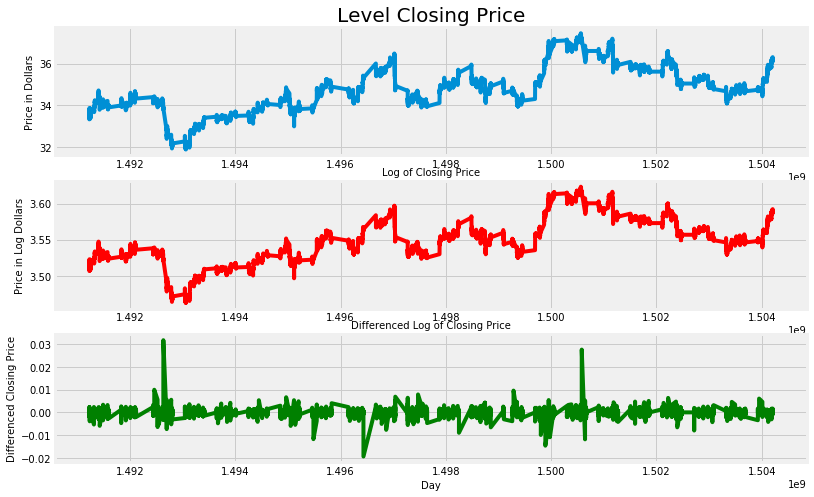

In [225]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data6.DATE, Data6.NASDAQ_EBAY, label = "NASDAQ.EBAY Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data6.DATE, Data6.logNASDAQ_EBAY, label = 'Log of NASDAQ.EBAY', color = 'r')
plt.title("Log of Closing Price", size = 10,)
plt.ylabel("Price in Log Dollars", size = 10)

plt.subplot(3, 1, 3)
plt.plot(Data6.DATE, Data6.diflogNASDAQ_EBAY, label = '1st Difference of Log of NASDAQ.ADP', color = 'g')
plt.title("Differenced Log of Closing Price", size = 10,)
plt.ylabel("Differenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)

Text(0,0.5,'PACF')

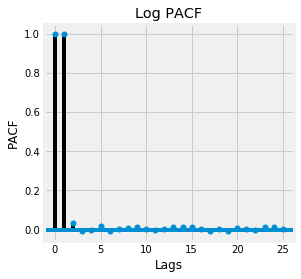

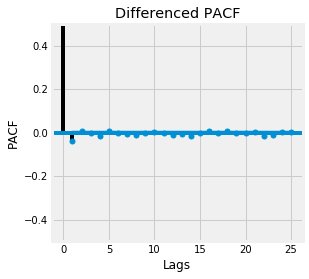

In [226]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data6.logNASDAQ_EBAY, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data6.diflogNASDAQ_EBAY, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [228]:
# Perform Dickey-Fuller test :
print('Results of Dickey-Fuller Test:')
dftest5 = adfuller(Data6.diflogNASDAQ_EBAY, autolag='AIC')
dfoutput5 = pd.Series(dftest5[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations used'])
for key, value in dftest5[4].items():
    dfoutput5['Critical Value (%s)'%key] = value
print (dfoutput5)

Results of Dickey-Fuller Test:
Test Statistic                   -30.655314
p-value                            0.000000
# Lags Used                       46.000000
Number of Observations used    41215.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [229]:
ararray6 = (Data6.logNASDAQ_EBAY.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray6, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p, d, q))
ARIMIAmod6 = ARIMA(ararray6, (p,d,q)).fit()

(0, 1, 0) -486487.9807526


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -486551.3744756722
(0, 1, 2) -486551.83230598114
(1, 1, 0) -486552.3070433145
(1, 1, 1) -486551.6340369541
(1, 1, 2) -486549.95196481905
(2, 1, 0) -486551.9213202163
(2, 1, 1) -486549.9206969764


C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 2) -486547.97796794906
Best Model is : (1, 1, 0)


In [230]:
ARIMIAmod6

In [231]:
predict6 = ARIMIAmod6.predict()
predict6

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([ 1.90926007e-06,  4.98602270e-06, -1.60123027e-05, ...,
        1.98578079e-06, -3.56029705e-06,  7.53185864e-06])

In [232]:
predict6.shape

(41261,)

In [233]:
len(ARIMIAmod6.predict())

C:\Users\skhaldar\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


41261

In [234]:
Data61 = Data6.drop(Data3.index[0])

In [235]:
Data61.shape

(41261, 4)

In [236]:
Data61['predict'] = predict6

In [237]:
Data61.head()

,DATE,NASDAQ_EBAY,logNASDAQ_EBAY,diflogNASDAQ_EBAY,predict
1,1491226260,33.395,3.508406,-0.000449,0.000002
2,1491226320,33.410,3.508855,0.002247,0.000005
3,1491226380,33.335,3.506608,-0.001948,-0.000016
4,1491226440,33.400,3.508556,-0.000898,0.000092
5,1491226500,33.430,3.509454,-0.001046,-0.000076


In [238]:
np.mean(np.square(np.array((Data61['diflogNASDAQ_EBAY'] - Data61['predict']))))

4.439881788226587e-07

In [239]:
numofsteps6 = 1
stephead6 = ARIMIAmod.forecast(numofsteps6)[0]
ferrors6 = ARIMIAmod.forecast(numofsteps6)[2]
ferrors6

array([[7.81217094, 7.81305108]])

In [241]:
error6 = (Data61['diflogNASDAQ_EBAY'] - Data61['predict'])
Data61['sqrError'] = np.square(error6)

In [242]:
Data61.head()

,DATE,NASDAQ_EBAY,logNASDAQ_EBAY,diflogNASDAQ_EBAY,predict,sqrError
1,1491226260,33.395,3.508406,-0.000449,0.000002,2.033807e-07
2,1491226320,33.410,3.508855,0.002247,0.000005,5.028242e-06
3,1491226380,33.335,3.506608,-0.001948,-0.000016,3.732592e-06
4,1491226440,33.400,3.508556,-0.000898,0.000092,9.798180e-07
5,1491226500,33.430,3.509454,-0.001046,-0.000076,9.415372e-07


In [243]:
Data61['errors'] = error6

In [244]:
Data61.head()

,DATE,NASDAQ_EBAY,logNASDAQ_EBAY,diflogNASDAQ_EBAY,predict,sqrError,errors
1,1491226260,33.395,3.508406,-0.000449,0.000002,2.033807e-07,-0.000451
2,1491226320,33.410,3.508855,0.002247,0.000005,5.028242e-06,0.002242
3,1491226380,33.335,3.506608,-0.001948,-0.000016,3.732592e-06,-0.001932
4,1491226440,33.400,3.508556,-0.000898,0.000092,9.798180e-07,-0.000990
5,1491226500,33.430,3.509454,-0.001046,-0.000076,9.415372e-07,-0.000970


Text(0.5,0,'Month')

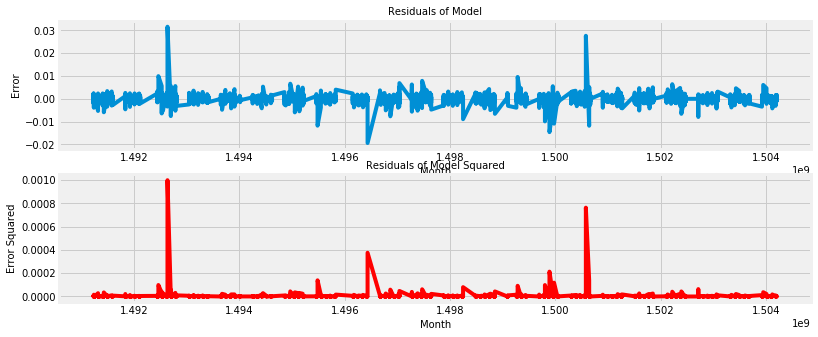

In [245]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(Data61.DATE, Data61.errors, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(Data61.DATE, Data61.sqrError, label = "Residual Squared", color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

C:\Users\skhaldar\Anaconda3\lib\site-packages\matplotlib\pyplot.py:962: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


Text(0.5,1,'Squared Error ACF Plot')

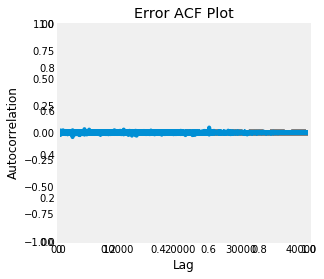

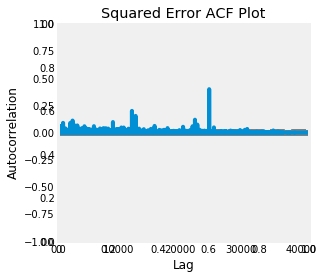

In [246]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data61.errors)
ax.set_title('Error ACF Plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(Data61.sqrError)
ax.set_title('Squared Error ACF Plot')

Text(0,0.5,'PACF')

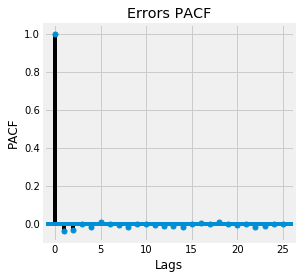

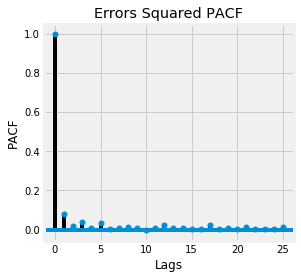

In [247]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data61.errors, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(Data61.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')